In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The following notebook, shows how to generate data used to predict the fission yeast structures. First, relevant parameters need to be selected to see if the input interaction matrices and output structures are as desired. Then once parameters are chosen the final part generates the data. Data folders need to be created for data to be stored in them. For each data folder, a train and test folder needs to be created. Then for each train and test, distance_matrices hic_matrices structure_matrices folders need to be created. They contain the D, H and S matrices created by ClusterWalk as shown in the paper. 

In [4]:
import numpy as np
import ChromFormer
import sys
from ChromFormer.data_generation.Uniform_Cluster_Walk import synthetic_biological_uniform_data_generator, generate_biological_structure
from ChromFormer.Data_Tools.Data_Calculation import generate_hic, import_trussart_data, import_fission_yeast
from ChromFormer.Data_Tools.Data_Plotting import plot_structure_in_sphere, plot_hic, plot_optimal_transport
from dotenv import load_dotenv
import os
load_dotenv() 
## Folder to which the training and testing data will be saved.
#The following uses the package python-dotenv that can be installed by pip to load the variable that contains your path to the data folder in a .env file 
DATA_DIR = os.environ.get('DATA_DIR')
DATA_PATH=f'{DATA_DIR}/biological_fission_yeast_uniform/'
NB_TRAINING = 400
NB_testing = 100
NB_BINS = 1258
DELTA = 0.2
ST_SIG = 5
END_SIG = 7
SIG = 6
CLUST_SIG = 1
CLUST_PROB = 0.8
SECONDSTEP = False
SEED = 42
EXPONENT = 1
ICING = True
MINMAXUSE= False
TRANSPORTATION = True
SOFTMAXING = False
AGING_STEP = 5
NB_POINT_CLUSTER = 15


The next part shows how to create a single structure. This structure is then plotted. This is done to find the desired parameters and to see how a structure with these parameters would look like. Important parameters are the following: nb_nodes representing the number of points in the structure, delta representing how smooth the structure should be, sigma representing how compact the overall structure should be, cluster_sigma representing how compact TADs should be, cluster_proba representing the probability of entering a TAD along the structure, aging_step decides how many steps must be taken before being elligible to enter a new cluster, and finally nb_point_cluster decides how many points must be in each TADs. Other tweeking parameters are usually unused with step2 being false but are documented in the package documentation. 

In [13]:
synthetic_biological_structure = generate_biological_structure(nb_nodes = 1258, delta = 0.2, start_sigma= 5,
                                                               end_sigma = 7, sigma = 6, 
                                                               cluster_sigma=1, cluster_proba = 0.8, step2 = False, aging_step=5, nb_point_cluster=15)


In [14]:
plot_structure_in_sphere(synthetic_biological_structure)

This part imports the Fission Yeast ground truth HiC used as a target distribution to match our generated HiCs.

In [23]:
fission_yeast_hic = import_fission_yeast(DATA_DIR)

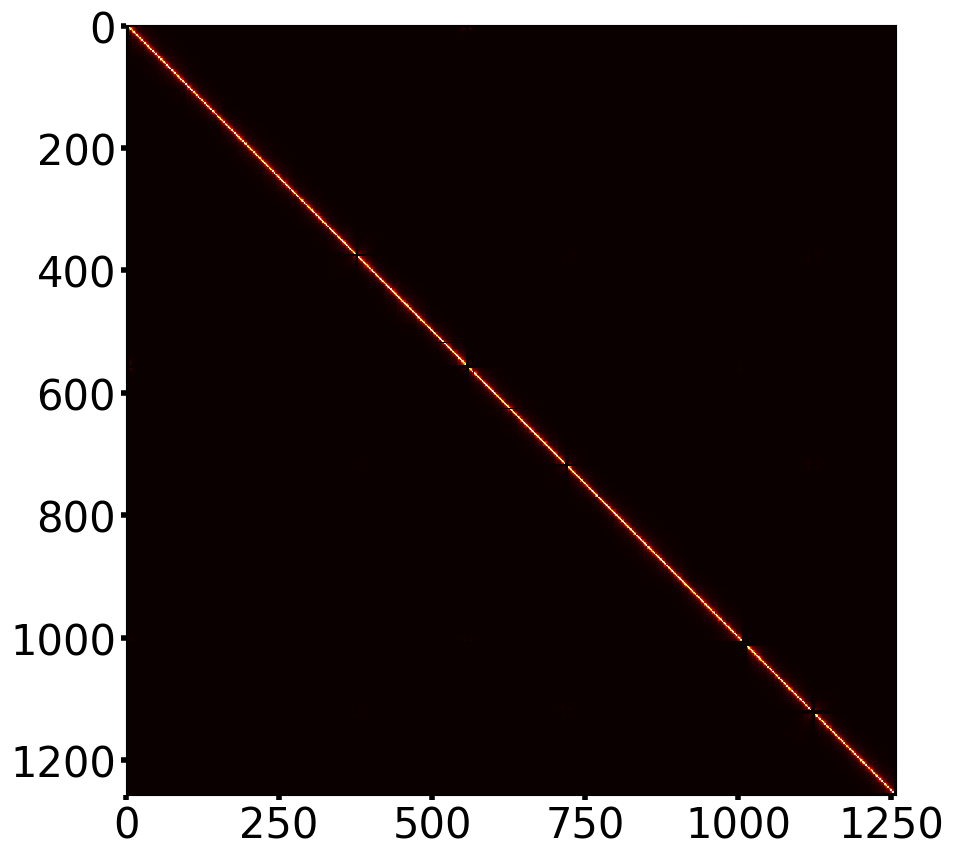

In [24]:
plot_hic(fission_yeast_hic)

In [25]:
new_hic = generate_hic(None, synthetic_biological_structure, fission_yeast_hic, use_ice =True, use_minmax =True, use_ot = False, use_softmax =True, seed =42, plot_optimal_transport =False, exponent =1)


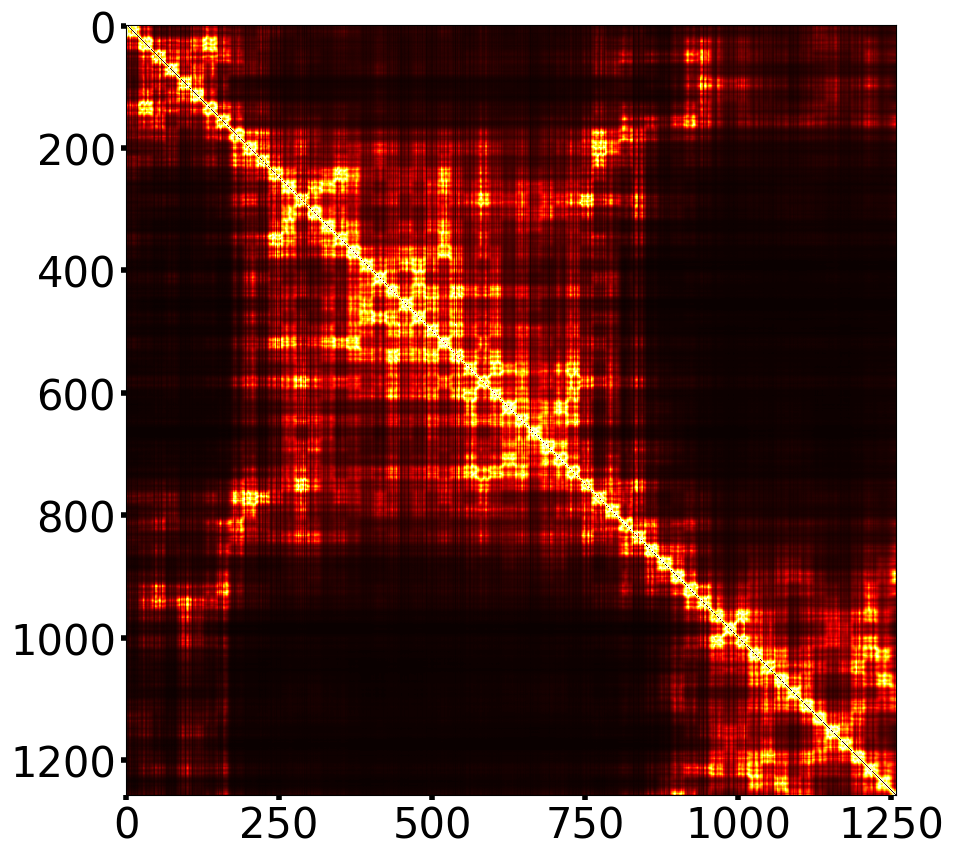

In [26]:
plot_hic(new_hic)

Then HiC matrices can be generated for a given structure the following way. The function takes a target HiC, the synthetically generated structure. Then the following important parameters are used and set to True: use_ice deciding wether to use ICE normalisation with z_score, use_ot which decides wether to transport the generated HiC to match the target HiC. The remaining parameters are usually set to false. The exponent decides as to what should be the alpha in the inverse alpha root power function (distance to HiC). The following are different HiC generated from the structures. Parameters can be played with until the desired ones are found. 

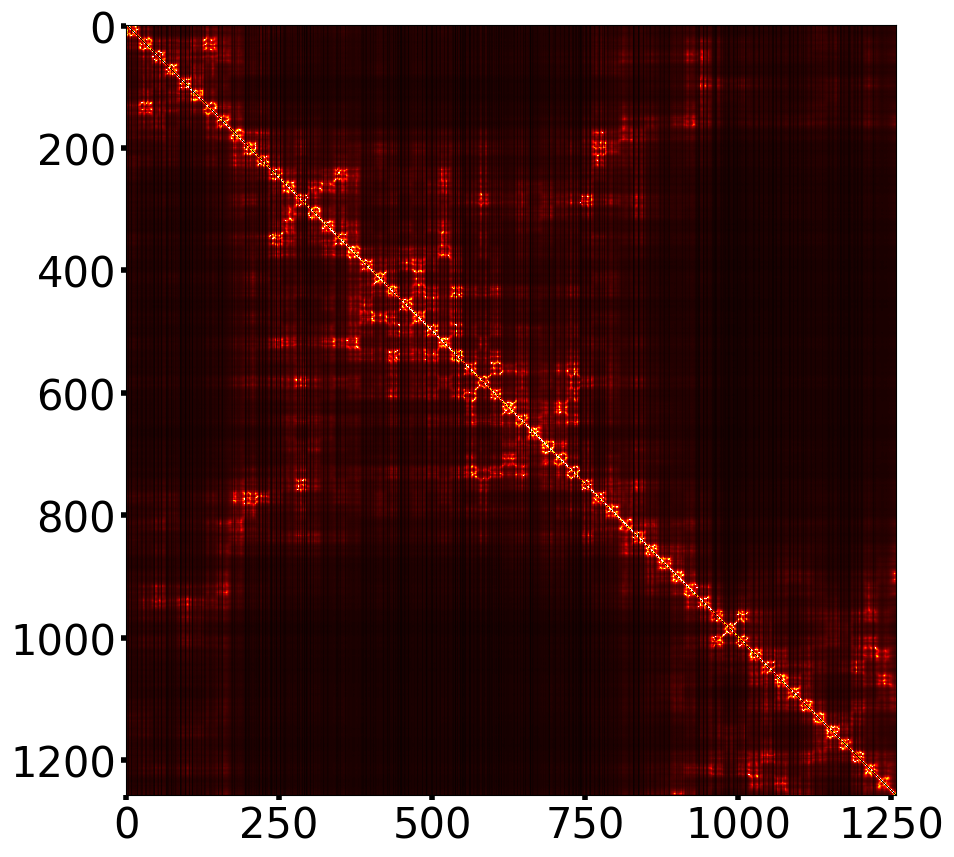

In [27]:
new_hic = generate_hic(None, synthetic_biological_structure, fission_yeast_hic, use_ice =False, use_minmax =True, use_ot = False, use_softmax =False, seed =42, plot_optimal_transport =False, exponent =1)
plot_hic(new_hic)

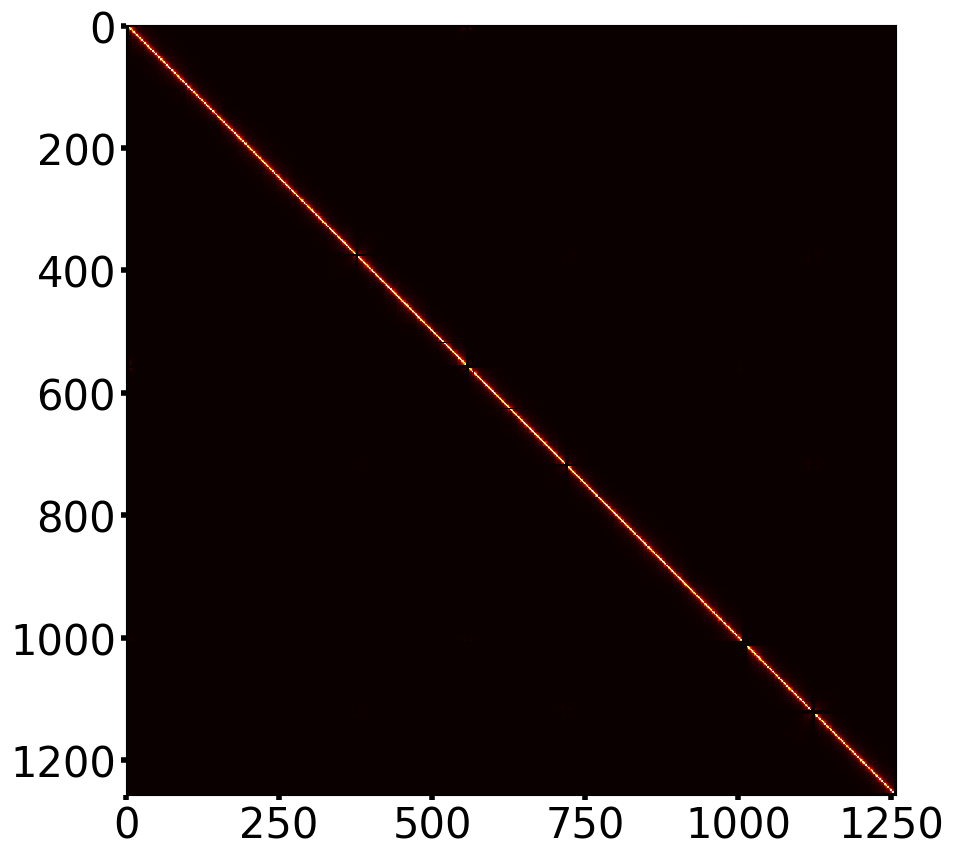

In [28]:
plot_hic(fission_yeast_hic)

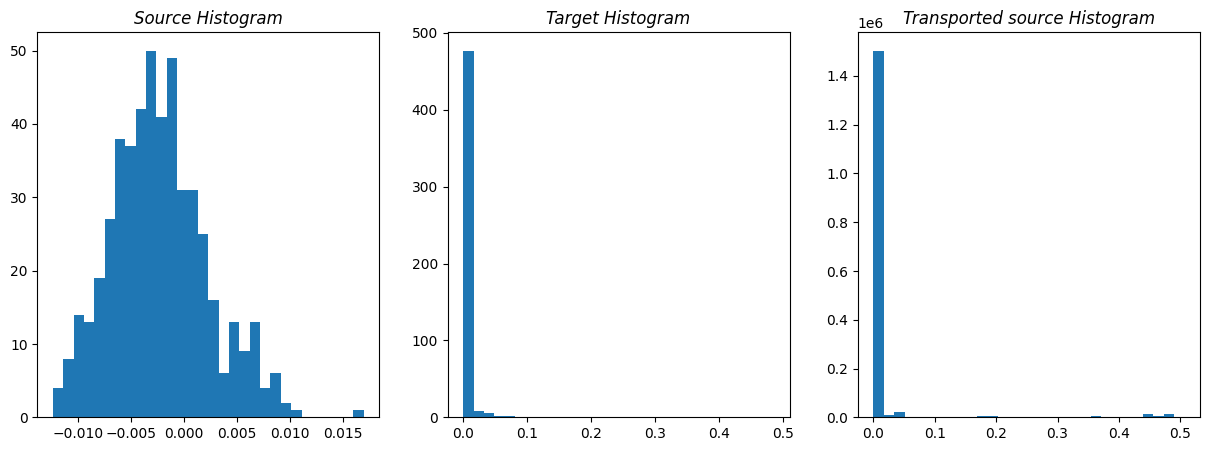

In [29]:

rng = np.random.RandomState(42)
#random.seed(seed)
#np.random.seed(seed)
new_hic, orig_hic, Xs, Xt = generate_hic(rng, synthetic_biological_structure, fission_yeast_hic, use_ice =True, use_minmax =False, use_ot = True, use_softmax =False, seed =42, plot_optimal_transport =True, exponent =1)

plot_optimal_transport(Xs, Xt, new_hic)

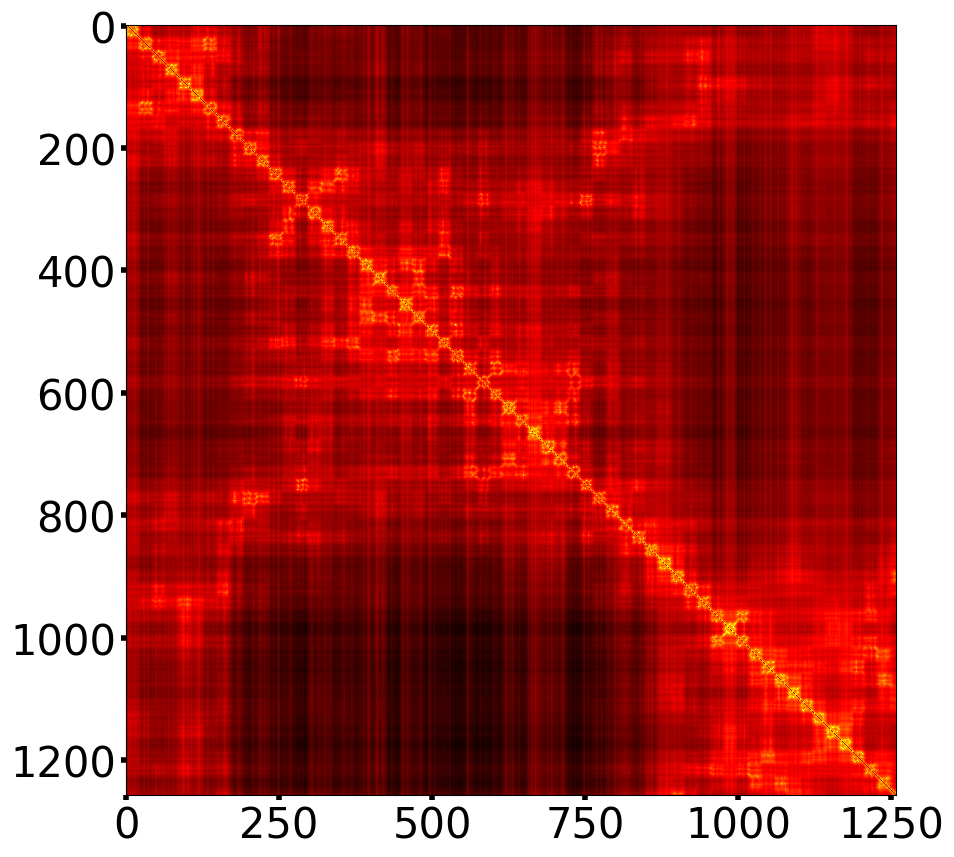

In [30]:
plot_hic(orig_hic)

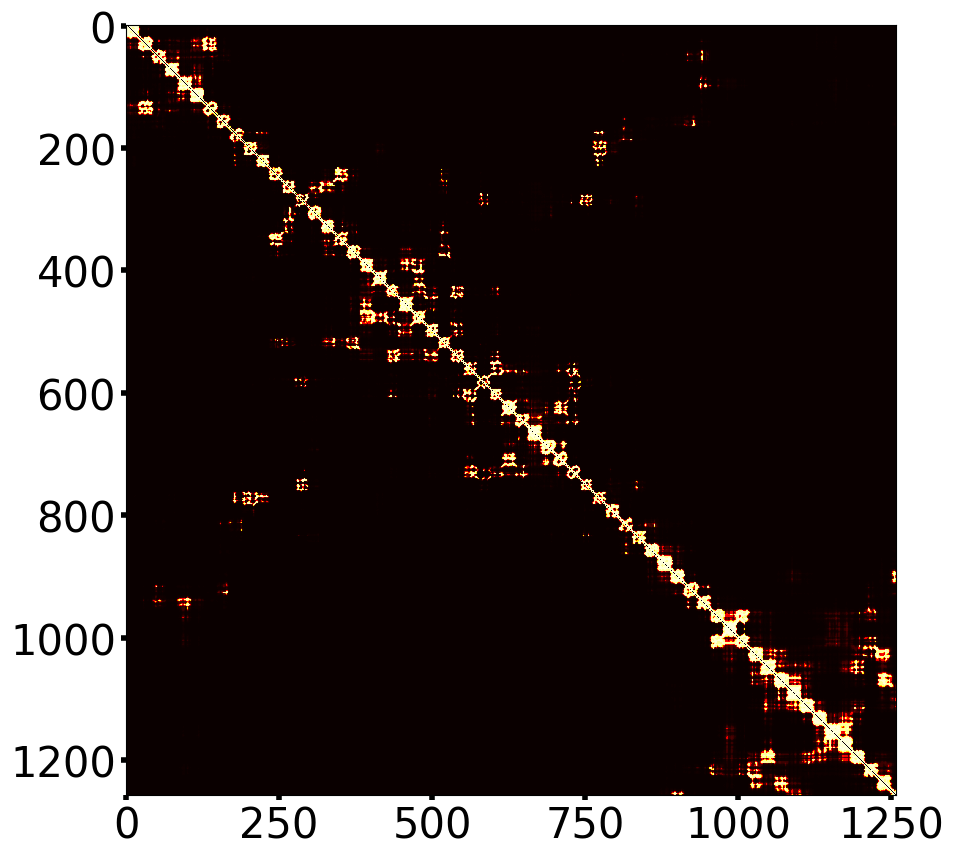

In [31]:
plot_hic(new_hic)

The following section uses the desired parameters to output NB_TRAINING training data and NB_testing testing data. 

In [14]:
import random

In [15]:
rng = np.random.RandomState(SEED)
random.seed(SEED)
np.random.seed(SEED)
synthetic_biological_uniform_data_generator(rng, fission_yeast_hic, n_structure = NB_TRAINING, data_path =  DATA_PATH,  nb_bins = NB_BINS, delta = DELTA, st_sig = ST_SIG, end_sig = END_SIG, sig = SIG, clust_sig = CLUST_SIG, clust_prob = CLUST_PROB, secondstep = SECONDSTEP, seed = SEED, alpha = EXPONENT, is_training = True , icing = ICING, minmaxuse= MINMAXUSE, transportation = TRANSPORTATION, softmaxing = SOFTMAXING, aging_step = AGING_STEP, nb_per_cluster = NB_POINT_CLUSTER)


100%|██████████| 400/400 [4:37:32<00:00, 41.63s/it]  


In [16]:
rng = np.random.RandomState(SEED)
random.seed(SEED)
np.random.seed(SEED)
synthetic_biological_uniform_data_generator(rng, fission_yeast_hic, n_structure = NB_testing, data_path =  DATA_PATH,  nb_bins = NB_BINS, delta = DELTA, st_sig = ST_SIG, end_sig = END_SIG, sig = SIG, clust_sig = CLUST_SIG, clust_prob = CLUST_PROB, secondstep = SECONDSTEP, seed = SEED, alpha = EXPONENT, is_training = False , icing = ICING, minmaxuse= MINMAXUSE, transportation = TRANSPORTATION, softmaxing = SOFTMAXING, aging_step = AGING_STEP, nb_per_cluster = NB_POINT_CLUSTER)

100%|██████████| 100/100 [1:07:02<00:00, 40.23s/it]
